# Linear regression and Stochastic Gradient Descent

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.base import BaseEstimator
from sklearn.metrics import mean_squared_error, log_loss, roc_auc_score
from sklearn.model_selection import train_test_split
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
class SGDRegressor(BaseEstimator):
    
    def __init__(self, eta=1e-3, n_epochs=3):
        self.eta = eta
        self.n_epochs = n_epochs
        self.mse_ = []
        self.weights_ = []
        
    def fit(self, X, y):
        # add a column of ones to the left from X
        X = np.hstack([np.ones([X.shape[0], 1]), X])
        
        # initialize w with zeros, (d + 1)-dimensional (2-dimensional)
        w = np.zeros(X.shape[1])
        
        for it in tqdm(range(self.n_epochs)):
            for i in range(X.shape[0]):
                
                # new_w is used for simultanious updates of w_0, w_1, ..., w_d
                new_w = w.copy()
                # special (simpler) formula for w_0
                new_w[0] += self.eta * (y[i] - w.dot(X[i, :]))
                for j in range(1, X.shape[1]):
                    new_w[j] += self.eta * (y[i] - w.dot(X[i, :])) * X[i, j]  
                w = new_w.copy()
                
                # store the current weight vector
                self.weights_.append(w)
                # store current loss function
                self.mse_.append(mean_squared_error(y, X.dot(w)))
        # the "best" vector of weights        
        self.w_ = self.weights_[np.argmin(self.mse_)]
                
        return self
                  
    def predict(self, X):
        # add a column of ones to the left from X
        X = np.hstack([np.ones([X.shape[0], 1]), X])
        # linear prediction
        return X.dot(self.w_)    

In [3]:
data_demo = pd.read_csv('../data/weights_heights.csv')

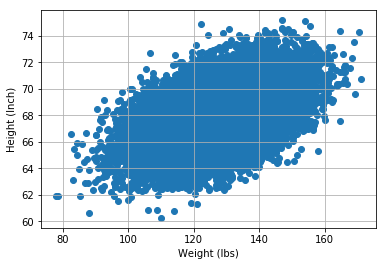

In [4]:
plt.scatter(data_demo['Weight'], data_demo['Height']);
plt.xlabel('Weight (lbs)')
plt.ylabel('Height (Inch)')
plt.grid();

In [4]:
X, y = data_demo['Weight'].values, data_demo['Height'].values

In [5]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                     test_size=0.3,
                                                     random_state=17)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape([-1, 1]))
X_valid_scaled = scaler.transform(X_valid.reshape([-1, 1]))

Train created `SGDRegressor` with (`X_train_scaled`, `y_train`) data. Leave default parameter values for now.

In [7]:
sgd = SGDRegressor(eta=0.001, n_epochs=3)
sgd.fit(X_train_scaled, y_train)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:11<00:00,  3.72s/it]


SGDRegressor(eta=0.001, n_epochs=3)

In [8]:
range(len(sgd.mse_))

range(0, 52500)

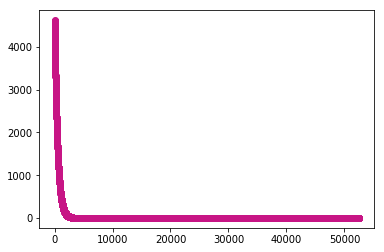

In [9]:
#sns.plot(range(len(sgd.mse_)),sgd.mse_);
plt.plot(range(len(sgd.mse_)), sgd.mse_, marker='o', color='mediumvioletred')
plt.show()

Print the minimal value of mean squared error and the best weights vector.

In [10]:
sgd.mse_[12626]

2.7151352406643627

In [11]:
sgd.w_

array([67.9898497 ,  0.94447605])

Draw chart of model weights (w0 and w1) behavior during training.

In [12]:
sgd.weights_[0]

array([ 0.06903432, -0.04162395])

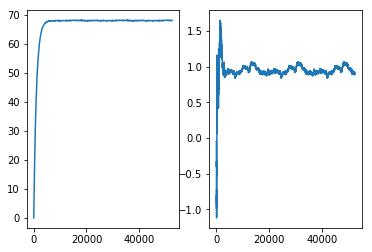

In [17]:
# you code here
plt.subplot(121)
plt.plot(range(len(sgd.weights_)), 
         [w[0] for w in sgd.weights_]);
plt.subplot(122)
plt.plot(range(len(sgd.weights_)), 
         [w[1] for w in sgd.weights_]);

Make a prediction for hold-out set (`X_valid_scaled`, `y_valid`) and check MSE value

In [19]:


# you code here
sgd_holdout_mse = mean_squared_error(y_valid, 
                                        sgd.predict(X_valid_scaled))
sgd_holdout_mse



2.6708681207033784

In [20]:
from sklearn.linear_model import LinearRegression 

In [21]:
lr = LinearRegression()

In [22]:
lr.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
linreg_holdout_mse = mean_squared_error(y_valid, lr.predict(X_valid_scaled))

In [24]:
try:
    assert (sgd_holdout_mse - linreg_holdout_mse) < 1e-4
    print('Correct!')
except AssertionError:
    print("Something's not good.\n Linreg's holdout MSE: {}"
          "\n SGD's holdout MSE: {}".format(linreg_holdout_mse, 
                                            sgd_holdout_mse))

Correct!


In [20]:
class SGDRegressor1(BaseEstimator):
    
    def __init__(self, eta=1e-3, n_epochs=3):
        self.eta = eta
        self.n_epochs = n_epochs
        
        self.mse_ = []
        self.weight_ = []
    
    def fit(self, X, y):
        X = np.c_[np.ones(len(X)), X]
        w = np.zeros((X.shape[1]))
        y = y.reshape(-1)
        for i in range(self.n_epochs): 
            np.random.seed(17+i)
            w += self.eta *\
                    ((y - X.dot(w))[np.random.choice(len(X), 1, replace=False)[0]]) *\
                                    X[np.random.choice(len(X), 1, replace=False)[0]]
            self.weight_.append(np.copy(w))                
            self.mse_.append(np.sum((y - X.dot(w))**2)/len(X))
        self.w_ = self.weight_[np.argmin(self.mse_)]
        return self

    def predict(self, X):
        X = np.c_[np.ones(len(X)), X]
        return X.dot(self.w_)

In [23]:
sgd_holdout_mse1 = mean_squared_error(y_valid, sgd1.predict(X_valid_scaled))

In [24]:
sgd_holdout_mse1, linreg_holdout_mse

(2.6706991199703296, 2.670830767667634)

In [25]:
try:
    assert (sgd_holdout_mse1 - linreg_holdout_mse) < 1e-4
    print('Correct!')
except AssertionError:
    print("Something's not good.\n Linreg's holdout MSE: {}"
          "\n SGD's holdout MSE: {}".format(linreg_holdout_mse, 
                                            sgd_holdout_mse1))

Correct!
